In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')

### Importing data

In [2]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("Firm_level_data.csv") 

# (1.1) Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, data types, shape, EDA). Perform Univariate and Bivariate Analysis. 

In [3]:
# Check top few records to get a feel of the data structure
df.head()

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [4]:
df.tail()

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
754,754,1253.900196,708.299935,32,412.936157,22.100002,yes,0.697454,267.119487,33.50
755,755,171.821025,73.666008,1,0.037735,1.684000,no,NaN,228.475701,46.41
756,756,202.726967,123.926991,13,74.861099,1.460000,no,5.229723,580.430741,42.25
757,757,785.687944,138.780992,6,0.621750,2.900000,yes,1.625398,309.938651,61.39
758,758,22.701999,14.244999,5,18.574360,0.197000,no,2.213070,18.940140,7.50


In [5]:
# drop the id column as it is useless for the model
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df.head()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    int64  
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   sp500         759 non-null    object 
 6   tobinq        738 non-null    float64
 7   value         759 non-null    float64
 8   institutions  759 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 53.5+ KB


In [8]:
df.describe(include="all")

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
count,759.000000,759.000000,759.000000,759.000000,759.000000,759,738.000000,759.000000,759.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,542,NaN,NaN,NaN
mean,2689.705158,1977.747498,25.831357,439.938074,14.164519,NaN,2.794910,2732.734750,43.020540
std,8722.060124,6466.704896,97.259577,2007.397588,43.321443,NaN,3.366591,7071.072362,21.685586
min,0.138000,0.057000,0.000000,0.000000,0.006000,NaN,0.119001,1.971053,0.000000
25%,122.920000,52.650501,1.000000,4.628262,0.927500,NaN,1.018783,103.593946,25.395000
50%,448.577082,202.179023,3.000000,36.864136,2.924000,NaN,1.680303,410.793529,44.110000
75%,1822.547366,1075.790020,11.500000,143.253403,10.050001,NaN,3.139309,2054.160386,60.510000


### unique values for categorical variables

In [9]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

SP500 :  2
yes    217
no     542
Name: sp500, dtype: int64




### Check for duplicate data

In [10]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(759, 9)


### Check for Missing values

In [11]:
df.isnull().sum()

sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

In [12]:
# Check for missing value in any column
df.isnull().sum()[df.isnull().sum()>0]

tobinq    21
dtype: int64

# Univariate / Bivariate analysis

## Univariate analysis for sales

In [13]:
print('Range of values: ', df['sales'].max()-df['sales'].min())

Range of values:  135696.650200008


In [14]:
#Central values 
print('Minimum sales: ', df['sales'].min())
print('Maximum sales: ',df['sales'].max())
print('Mean value: ', df['sales'].mean())
print('Median value: ',df['sales'].median())
print('Standard deviation: ', df['sales'].std())
print('Null values: ',df['sales'].isnull().any())

Minimum sales:  0.137999992
Maximum sales:  135696.7882
Mean value:  2689.7051583911725
Median value:  448.5770816
Standard deviation:  8722.060123549634
Null values:  False


In [15]:
#Quartiles

Q1=df['sales'].quantile(q=0.25)
Q3=df['sales'].quantile(q=0.75)
print('sales - 1st Quartile (Q1) is: ', Q1)
print('sales - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of sales is ', stats.iqr(df['sales']))

sales - 1st Quartile (Q1) is:  122.92000005
sales - 3st Quartile (Q3) is:  1822.5473665
Interquartile range (IQR) of sales is  1699.62736645


In [16]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in sales: ', L_outliers)
print('Upper outliers in sales: ', U_outliers)

Lower outliers in sales:  -2426.5210496249997
Upper outliers in sales:  4371.988416175


In [17]:
print('Number of outliers in sales upper : ', df[df['sales']>4371.988416175]['sales'].count())
print('Number of outliers in sales lower : ', df[df['sales']<-2426.5210496249997]['sales'].count())
print('% of Outlier in sales upper: ',round(df[df['sales']>4371.988416175]['sales'].count()*100/len(df)), '%')
print('% of Outlier in sales lower: ',round(df[df['sales']<-2426.5210496249997]['sales'].count()*100/len(df)), '%')

Number of outliers in sales upper :  100
Number of outliers in sales lower :  0
% of Outlier in sales upper:  13 %
% of Outlier in sales lower:  0 %


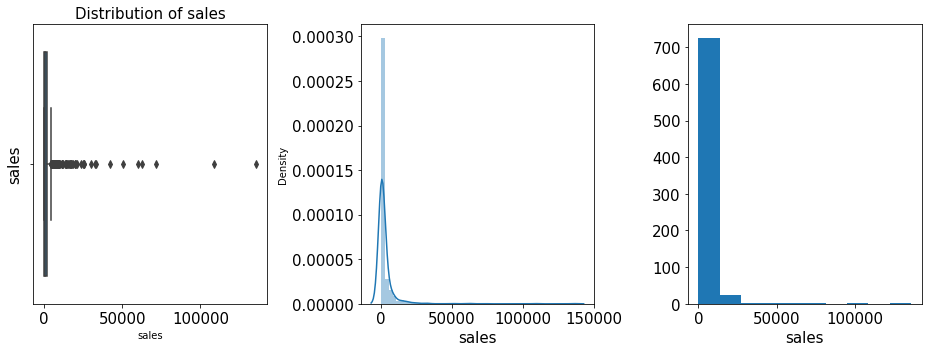

In [18]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='sales',data=df,orient='v',ax=ax1)
ax1.set_ylabel('sales', fontsize=15)
ax1.set_title('Distribution of sales', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['sales'],ax=ax2)
ax2.set_xlabel('sales', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['sales'])
ax3.set_xlabel('sales', fontsize=15)
ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Univariate analysis for capital

In [19]:
print('Range of values: ', df['capital'].max()-df['capital'].min())

Range of values:  93625.143559993


In [20]:
#Central values 
print('Minimum capital: ', df['capital'].min())
print('Maximum capital: ',df['capital'].max())
print('Mean value: ', df['capital'].mean())
print('Median value: ',df['capital'].median())
print('Standard deviation: ', df['capital'].std())
print('Null values: ',df['capital'].isnull().any())

Minimum capital:  0.057000007
Maximum capital:  93625.20056
Mean value:  1977.7474983831519
Median value:  202.1790229
Standard deviation:  6466.704896477436
Null values:  False


In [21]:
#Quartiles

Q1=df['capital'].quantile(q=0.25)
Q3=df['capital'].quantile(q=0.75)
print('capital - 1st Quartile (Q1) is: ', Q1)
print('capita; - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of capital is ', stats.iqr(df['capital']))

capital - 1st Quartile (Q1) is:  52.650500755
capita; - 3st Quartile (Q3) is:  1075.79002
Interquartile range (IQR) of capital is  1023.1395192449999


In [22]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in capital: ', L_outliers)
print('Upper outliers in capital: ', U_outliers)

Lower outliers in capital:  -1482.0587781124998
Upper outliers in capital:  2610.4992988674994


In [23]:
print('Number of outliers in capital upper : ', df[df['capital']>2610.4992988674994]['capital'].count())
print('Number of outliers in capital lower : ', df[df['capital']<-1482.0587781124998]['capital'].count())
print('% of Outlier in capital upper: ',round(df[df['capital']>2610.4992988674994]['capital'].count()*100/len(df)), '%')
print('% of Outlier in capital lower: ',round(df[df['capital']<-1482.0587781124998]['capital'].count()*100/len(df)), '%')

Number of outliers in capital upper :  121
Number of outliers in capital lower :  0
% of Outlier in capital upper:  16 %
% of Outlier in capital lower:  0 %


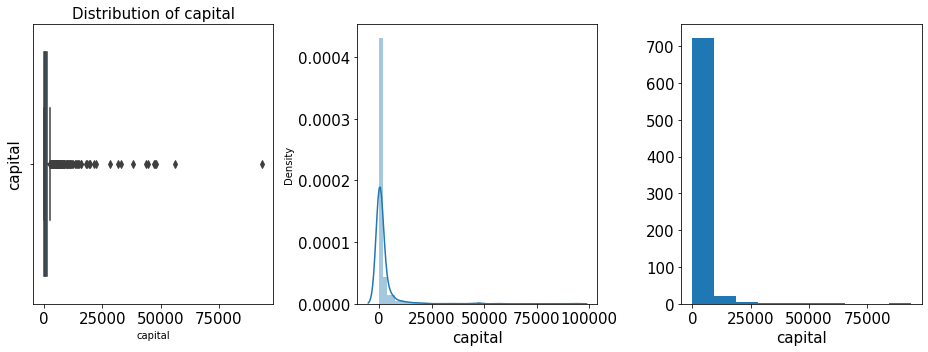

In [24]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='capital',data=df,orient='v',ax=ax1)
ax1.set_ylabel('capital', fontsize=15)
ax1.set_title('Distribution of capital', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['capital'],ax=ax2)
ax2.set_xlabel('capital', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['capital'])
ax3.set_xlabel('capital', fontsize=15)
ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Univariate analysis for patents

In [25]:
print('Range of values: ', df['patents'].max()-df['patents'].min())

Range of values:  1220


In [26]:
#Central values 
print('Minimum patents: ', df['patents'].min())
print('Maximum patents: ',df['patents'].max())
print('Mean value: ', df['patents'].mean())
print('Median value: ',df['patents'].median())
print('Standard deviation: ', df['patents'].std())
print('Null values: ',df['patents'].isnull().any())

Minimum patents:  0
Maximum patents:  1220
Mean value:  25.83135704874835
Median value:  3.0
Standard deviation:  97.25957715254633
Null values:  False


In [27]:
#Quartiles

Q1=df['patents'].quantile(q=0.25)
Q3=df['patents'].quantile(q=0.75)
print('patents - 1st Quartile (Q1) is: ', Q1)
print('patents - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of patents is ', stats.iqr(df['patents']))

patents - 1st Quartile (Q1) is:  1.0
patents - 3st Quartile (Q3) is:  11.5
Interquartile range (IQR) of patents is  10.5


In [28]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in patents: ', L_outliers)
print('Upper outliers in patents: ', U_outliers)

Lower outliers in patents:  -14.75
Upper outliers in patents:  27.25


In [29]:
print('Number of outliers in patents upper : ', df[df['patents']>2.0250000000000004]['patents'].count())
print('Number of outliers in patents lower : ', df[df['patents']<-0.5750000000000001]['patents'].count())
print('% of Outlier in patents upper: ',round(df[df['patents']>2.0250000000000004]['patents'].count()*100/len(df)), '%')
print('% of Outlier in patents lower: ',round(df[df['patents']<-0.5750000000000001]['patents'].count()*100/len(df)), '%')

Number of outliers in patents upper :  392
Number of outliers in patents lower :  0
% of Outlier in patents upper:  52 %
% of Outlier in patents lower:  0 %


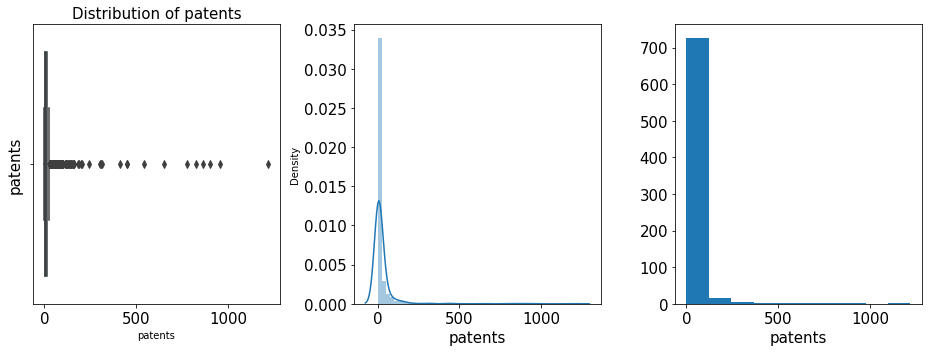

In [30]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='patents',data=df,orient='v',ax=ax1)
ax1.set_ylabel('patents', fontsize=15)
ax1.set_title('Distribution of patents', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['patents'],ax=ax2)
ax2.set_xlabel('patents', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['patents'])
ax3.set_xlabel('patents', fontsize=15)
ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Univariate analysis for randd

In [31]:
print('Range of values: ', df['randd'].max()-df['randd'].min())

Range of values:  30425.25586


In [32]:
#Central values 
print('Minimum randd: ', df['randd'].min())
print('Maximum randd: ',df['randd'].max())
print('Mean value: ', df['randd'].mean())
print('Median value: ',df['randd'].median())
print('Standard deviation: ', df['randd'].std())
print('Null values: ',df['randd'].isnull().any())

Minimum randd:  0.0
Maximum randd:  30425.25586
Mean value:  439.93807440153233
Median value:  36.86413574
Standard deviation:  2007.397588301153
Null values:  False


In [33]:
#Quartiles

Q1=df['randd'].quantile(q=0.25)
Q3=df['randd'].quantile(q=0.75)
print('randd - 1st Quartile (Q1) is: ', Q1)
print('randd - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of patents is ', stats.iqr(df['randd']))

randd - 1st Quartile (Q1) is:  4.628261804499999
randd - 3st Quartile (Q3) is:  143.25340269999998
Interquartile range (IQR) of patents is  138.62514089549998


In [34]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in randd: ', L_outliers)
print('Upper outliers in randd: ', U_outliers)

Lower outliers in randd:  -203.30944953875
Upper outliers in randd:  351.19111404324997


In [35]:
print('Number of outliers in randd upper : ', df[df['randd']>2.0250000000000004]['randd'].count())
print('Number of outliers in randd lower : ', df[df['randd']<-0.5750000000000001]['randd'].count())
print('% of Outlier in randd upper: ',round(df[df['randd']>2.0250000000000004]['randd'].count()*100/len(df)), '%')
print('% of Outlier in randd lower: ',round(df[df['randd']<-0.5750000000000001]['randd'].count()*100/len(df)), '%')

Number of outliers in randd upper :  599
Number of outliers in randd lower :  0
% of Outlier in randd upper:  79 %
% of Outlier in randd lower:  0 %


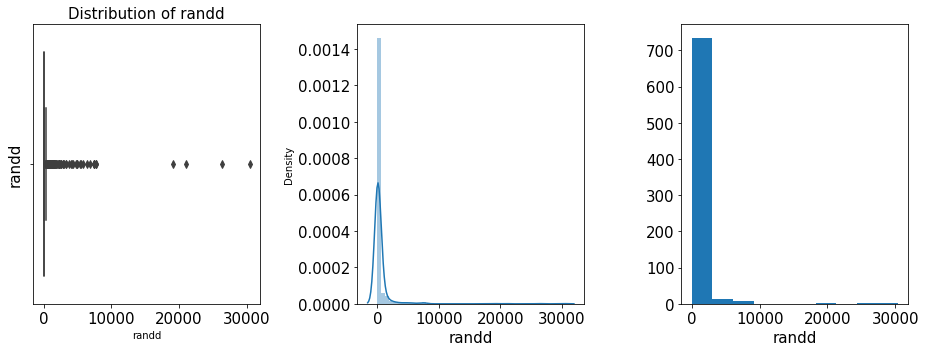

In [36]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='randd',data=df,orient='v',ax=ax1)
ax1.set_ylabel('randd', fontsize=15)
ax1.set_title('Distribution of randd', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['randd'],ax=ax2)
ax2.set_xlabel('randd', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['randd'])
ax3.set_xlabel('randd', fontsize=15)
ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Univariate analysis for employment

In [37]:
print('Range of values: ', df['employment'].max()-df['employment'].min())

Range of values:  710.7939253000001


In [38]:
#Central values 
print('Minimum employment: ', df['employment'].min())
print('Maximum employment: ',df['employment'].max())
print('Mean value: ', df['employment'].mean())
print('Median value: ',df['employment'].median())
print('Standard deviation: ', df['employment'].std())
print('Null values: ',df['employment'].isnull().any())

Minimum employment:  0.006
Maximum employment:  710.7999253
Mean value:  14.164519060835328
Median value:  2.923999904
Standard deviation:  43.32144275723183
Null values:  False


In [39]:
#Quartiles

Q1=df['employment'].quantile(q=0.25)
Q3=df['employment'].quantile(q=0.75)
print('employment - 1st Quartile (Q1) is: ', Q1)
print('employment - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of employment is ', stats.iqr(df['employment']))

employment - 1st Quartile (Q1) is:  0.927500012
employment - 3st Quartile (Q3) is:  10.05000067
Interquartile range (IQR) of employment is  9.122500658


In [40]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in employment: ', L_outliers)
print('Upper outliers in employment: ', U_outliers)

Lower outliers in employment:  -12.756250975
Upper outliers in employment:  23.733751657


In [41]:
print('Number of outliers in employment upper : ', df[df['employment']>2.0250000000000004]['employment'].count())
print('Number of outliers in employment lower : ', df[df['employment']<-0.5750000000000001]['employment'].count())
print('% of Outlier in employment upper: ',round(df[df['employment']>2.0250000000000004]['employment'].count()*100/len(df)), '%')
print('% of Outlier in employment lower: ',round(df[df['employment']<-0.5750000000000001]['employment'].count()*100/len(df)), '%')

Number of outliers in employment upper :  437
Number of outliers in employment lower :  0
% of Outlier in employment upper:  58 %
% of Outlier in employment lower:  0 %


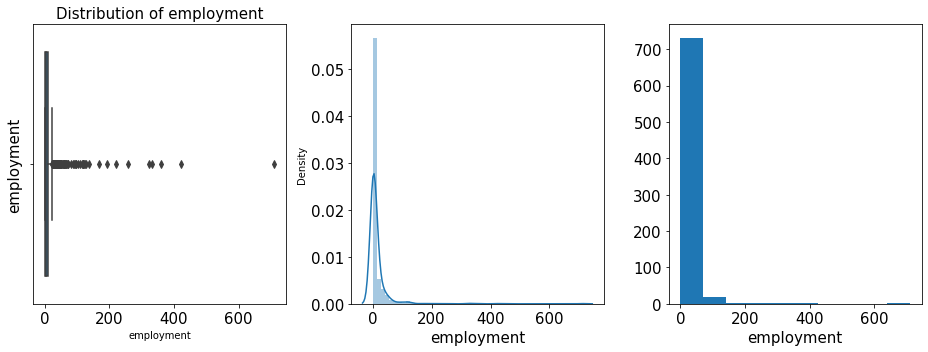

In [42]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='employment',data=df,orient='v',ax=ax1)
ax1.set_ylabel('employment', fontsize=15)
ax1.set_title('Distribution of employment', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['employment'],ax=ax2)
ax2.set_xlabel('employment', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['employment'])
ax3.set_xlabel('employment', fontsize=15)
ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Univariate analysis for tobinq

In [43]:
print('Range of values: ', df['tobinq'].max()-df['tobinq'].min())

Range of values:  19.880999081


In [44]:
#Central values 
print('Minimum tobinq: ', df['tobinq'].min())
print('Maximum tobinq: ',df['tobinq'].max())
print('Mean value: ', df['tobinq'].mean())
print('Median value: ',df['tobinq'].median())
print('Standard deviation: ', df['tobinq'].std())
print('Null values: ',df['tobinq'].isnull().any())

Minimum tobinq:  0.119000919
Maximum tobinq:  20.0
Mean value:  2.794909616151768
Median value:  1.6803032755
Standard deviation:  3.3665910008133415
Null values:  True


In [45]:
#Quartiles

Q1=df['tobinq'].quantile(q=0.25)
Q3=df['tobinq'].quantile(q=0.75)
print('tobinq - 1st Quartile (Q1) is: ', Q1)
print('tobinq - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of tobinq is ', stats.iqr(df['tobinq']))

tobinq - 1st Quartile (Q1) is:  1.01878282425
tobinq - 3st Quartile (Q3) is:  3.1393088697500002
Interquartile range (IQR) of tobinq is  nan


In [46]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in tobinq: ', L_outliers)
print('Upper outliers in tobinq: ', U_outliers)

Lower outliers in tobinq:  -2.162006244
Upper outliers in tobinq:  6.320097938


In [47]:
print('Number of outliers in tobinq upper : ', df[df['tobinq']>2.0250000000000004]['tobinq'].count())
print('Number of outliers in tobinq lower : ', df[df['tobinq']<-0.5750000000000001]['tobinq'].count())
print('% of Outlier in tobinq upper: ',round(df[df['tobinq']>2.0250000000000004]['tobinq'].count()*100/len(df)), '%')
print('% of Outlier in tobinq lower: ',round(df[df['tobinq']<-0.5750000000000001]['tobinq'].count()*100/len(df)), '%')

Number of outliers in tobinq upper :  307
Number of outliers in tobinq lower :  0
% of Outlier in tobinq upper:  40 %
% of Outlier in tobinq lower:  0 %


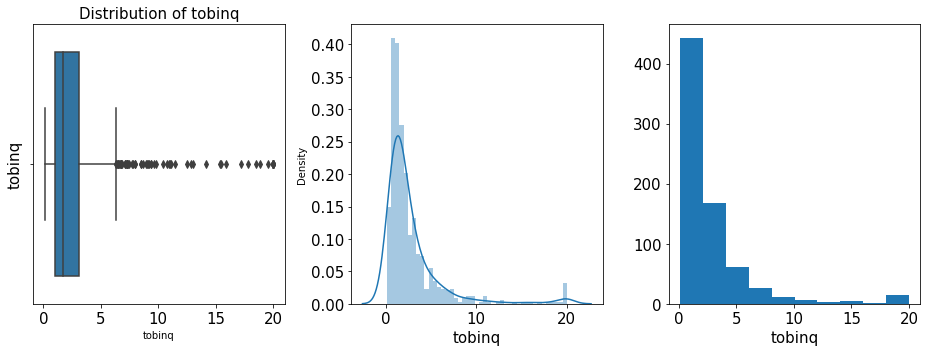

In [48]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='tobinq',data=df,orient='v',ax=ax1)
ax1.set_ylabel('tobinq', fontsize=15)
ax1.set_title('Distribution of tobinq', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['tobinq'],ax=ax2)
ax2.set_xlabel('tobinq', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['tobinq'])
ax3.set_xlabel('tobinq', fontsize=15)
ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Univariate analysis for value

In [49]:
print('Range of values: ', df['value'].max()-df['value'].min())

Range of values:  95189.620107297


In [50]:
#Central values 
print('Minimum value: ', df['value'].min())
print('Maximum value: ',df['value'].max())
print('Mean value: ', df['value'].mean())
print('Median value: ',df['value'].median())
print('Standard deviation: ', df['value'].std())
print('Null values: ',df['value'].isnull().any())

Minimum value:  1.971052703
Maximum value:  95191.59116
Mean value:  2732.7347504805684
Median value:  410.7935287
Standard deviation:  7071.07236179865
Null values:  False


In [51]:
#Quartiles

Q1=df['value'].quantile(q=0.25)
Q3=df['value'].quantile(q=0.75)
print('value - 1st Quartile (Q1) is: ', Q1)
print('value - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of value is ', stats.iqr(df['value']))

value - 1st Quartile (Q1) is:  103.59394635
value - 3st Quartile (Q3) is:  2054.1603855000003
Interquartile range (IQR) of value is  1950.5664391500004


In [52]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in value: ', L_outliers)
print('Upper outliers in value: ', U_outliers)

Lower outliers in value:  -2822.2557123750007
Upper outliers in value:  4980.0100442250005


In [53]:
print('Number of outliers in value upper : ', df[df['value']>2.0250000000000004]['value'].count())
print('Number of outliers in value lower : ', df[df['value']<-0.5750000000000001]['value'].count())
print('% of Outlier in value upper: ',round(df[df['value']>2.0250000000000004]['value'].count()*100/len(df)), '%')
print('% of Outlier in value lower: ',round(df[df['value']<-0.5750000000000001]['value'].count()*100/len(df)), '%')

Number of outliers in value upper :  758
Number of outliers in value lower :  0
% of Outlier in value upper:  100 %
% of Outlier in value lower:  0 %


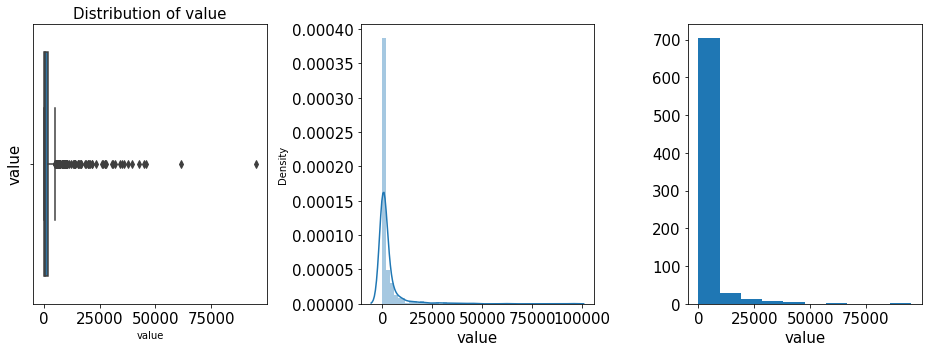

In [54]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='value',data=df,orient='v',ax=ax1)
ax1.set_ylabel('value', fontsize=15)
ax1.set_title('Distribution of value', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['value'],ax=ax2)
ax2.set_xlabel('value', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['value'])
ax3.set_xlabel('value', fontsize=15)
ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Univariate analysis for institutions

In [55]:
print('Range of values: ', df['institutions'].max()-df['institutions'].min())

Range of values:  90.15


In [56]:
#Central values 
print('Minimum institutions: ', df['institutions'].min())
print('Maximum institutions: ',df['institutions'].max())
print('Mean institutions: ', df['institutions'].mean())
print('Median institutions: ',df['institutions'].median())
print('Standard deviation: ', df['institutions'].std())
print('Null values: ',df['institutions'].isnull().any())

Minimum institutions:  0.0
Maximum institutions:  90.15
Mean institutions:  43.0205401844532
Median institutions:  44.11
Standard deviation:  21.685586451239928
Null values:  False


In [57]:
#Quartiles

Q1=df['institutions'].quantile(q=0.25)
Q3=df['institutions'].quantile(q=0.75)
print('institutions - 1st Quartile (Q1) is: ', Q1)
print('institutions - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of institutions is ', stats.iqr(df['institutions']))

institutions - 1st Quartile (Q1) is:  25.395000000000003
institutions - 3st Quartile (Q3) is:  60.51
Interquartile range (IQR) of institutions is  35.114999999999995


In [58]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in institutions: ', L_outliers)
print('Upper outliers in institutions: ', U_outliers)

Lower outliers in institutions:  -27.27749999999999
Upper outliers in institutions:  113.18249999999999


In [59]:
print('Number of outliers in institutions upper : ', df[df['institutions']>2.0250000000000004]['institutions'].count())
print('Number of outliers in institutions lower : ', df[df['institutions']<-0.5750000000000001]['institutions'].count())
print('% of Outlier in institutions upper: ',round(df[df['institutions']>2.0250000000000004]['institutions'].count()*100/len(df)), '%')
print('% of Outlier in institutions lower: ',round(df[df['institutions']<-0.5750000000000001]['institutions'].count()*100/len(df)), '%')

Number of outliers in institutions upper :  736
Number of outliers in institutions lower :  0
% of Outlier in institutions upper:  97 %
% of Outlier in institutions lower:  0 %


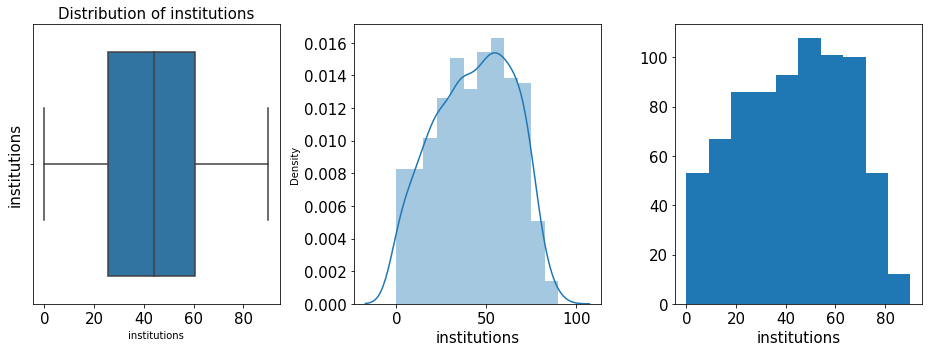

In [60]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='institutions',data=df,orient='v',ax=ax1)
ax1.set_ylabel('institutions', fontsize=15)
ax1.set_title('Distribution of institutions', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['institutions'],ax=ax2)
ax2.set_xlabel('institutions', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['institutions'])
ax3.set_xlabel('institutions', fontsize=15)
ax3.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

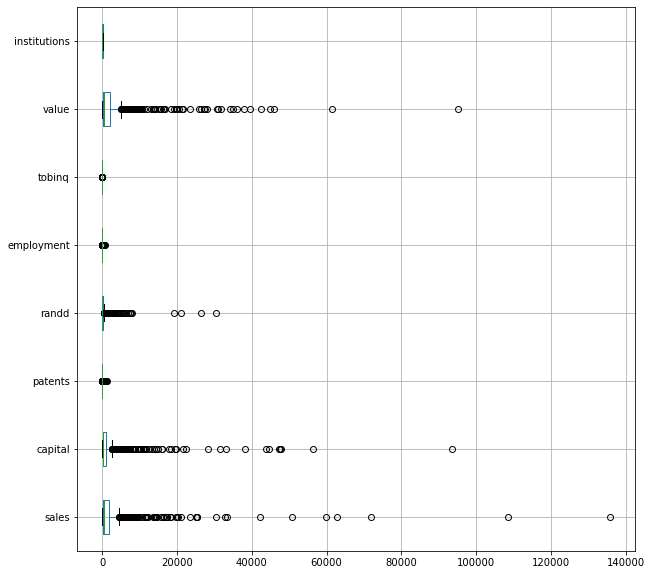

In [61]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.show()

In [62]:
df.skew()

sales            9.219023
capital          7.555091
patents          7.766943
randd           10.270483
employment       9.068875
tobinq           3.285773
value            6.075996
institutions    -0.168071
dtype: float64

# Categorical Variable

In [63]:
df.groupby(["sp500"]).count()

,sales,capital,patents,randd,employment,tobinq,value,institutions
sp500,,,,,,,,
no,542,542,542,542,542,521,542,542
yes,217,217,217,217,217,217,217,217


<AxesSubplot:xlabel='sp500', ylabel='count'>

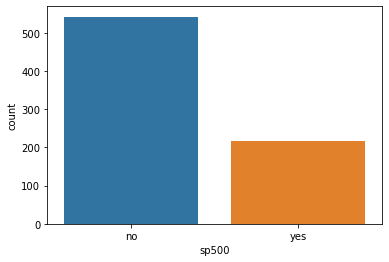

In [64]:
sns.countplot(df['sp500'])

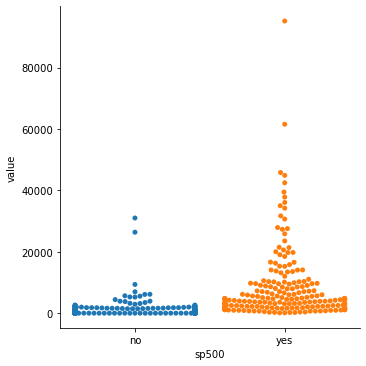

In [65]:
sns.catplot(x="sp500", y="value",kind="swarm",data=df)

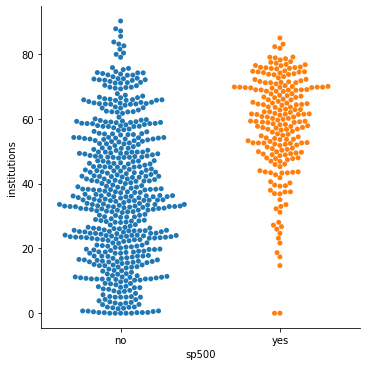

In [66]:
sns.catplot(x="sp500", y="institutions",kind="swarm",data=df)

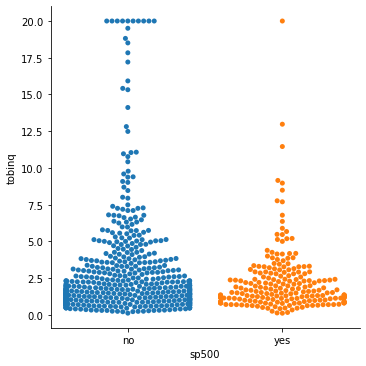

In [67]:
sns.catplot(x="sp500", y="tobinq",kind="swarm",data=df)

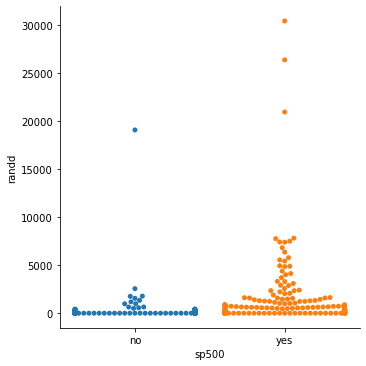

In [68]:
sns.catplot(x="sp500", y="randd",kind="swarm",data=df)

<AxesSubplot:xlabel='capital', ylabel='sales'>

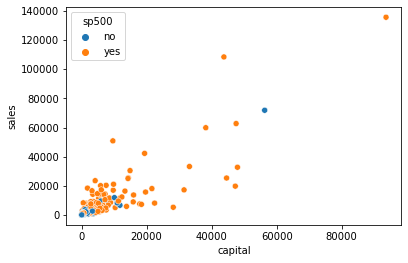

In [69]:
sns.scatterplot(data = df, x='capital',y='sales', hue = 'sp500')

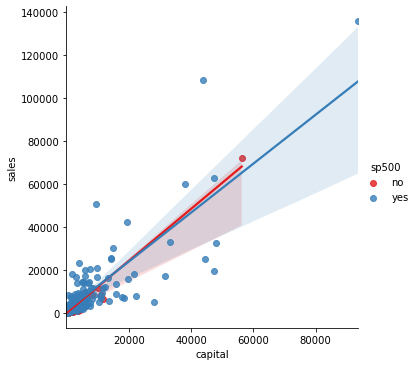

In [70]:
sns.lmplot(x="capital", y="sales", hue="sp500", data=df,
               palette="Set1")

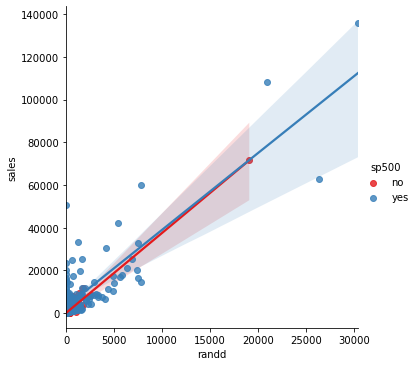

In [71]:
sns.lmplot(x="randd", y="sales", hue="sp500", data=df,
               palette="Set1")

<AxesSubplot:xlabel='capital', ylabel='tobinq'>

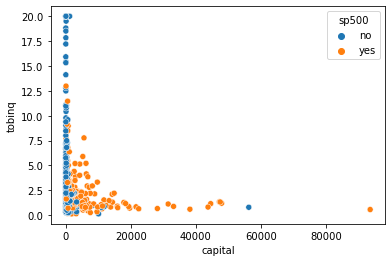

In [72]:
sns.scatterplot(data = df, x='capital',y='tobinq', hue = 'sp500')

<AxesSubplot:xlabel='employment', ylabel='sales'>

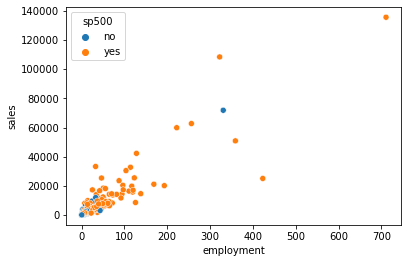

In [73]:
sns.scatterplot(data = df, x='employment',y='sales', hue = 'sp500')

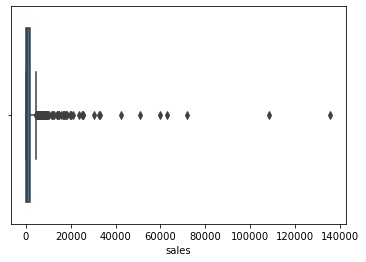

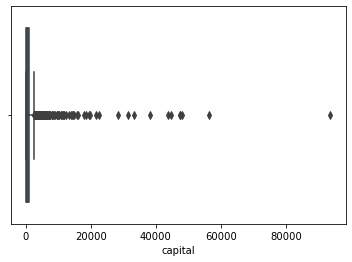

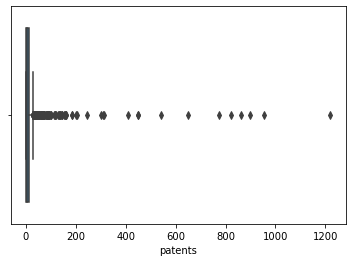

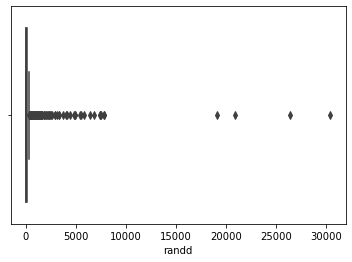

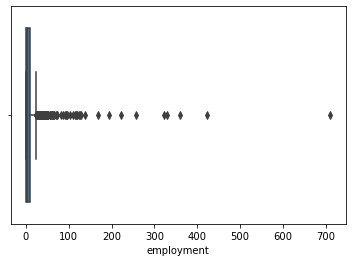

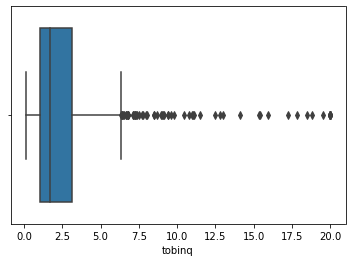

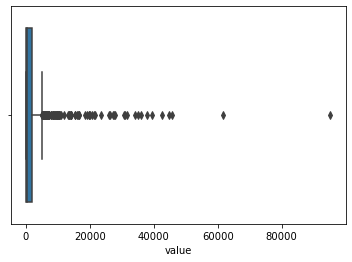

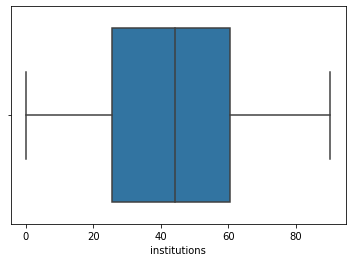

In [74]:
cols = ['sales','capital','patents','randd','employment','tobinq','value','institutions']
for i in cols:
    sns.boxplot(df[i])
    plt.show()

### Data Distribution

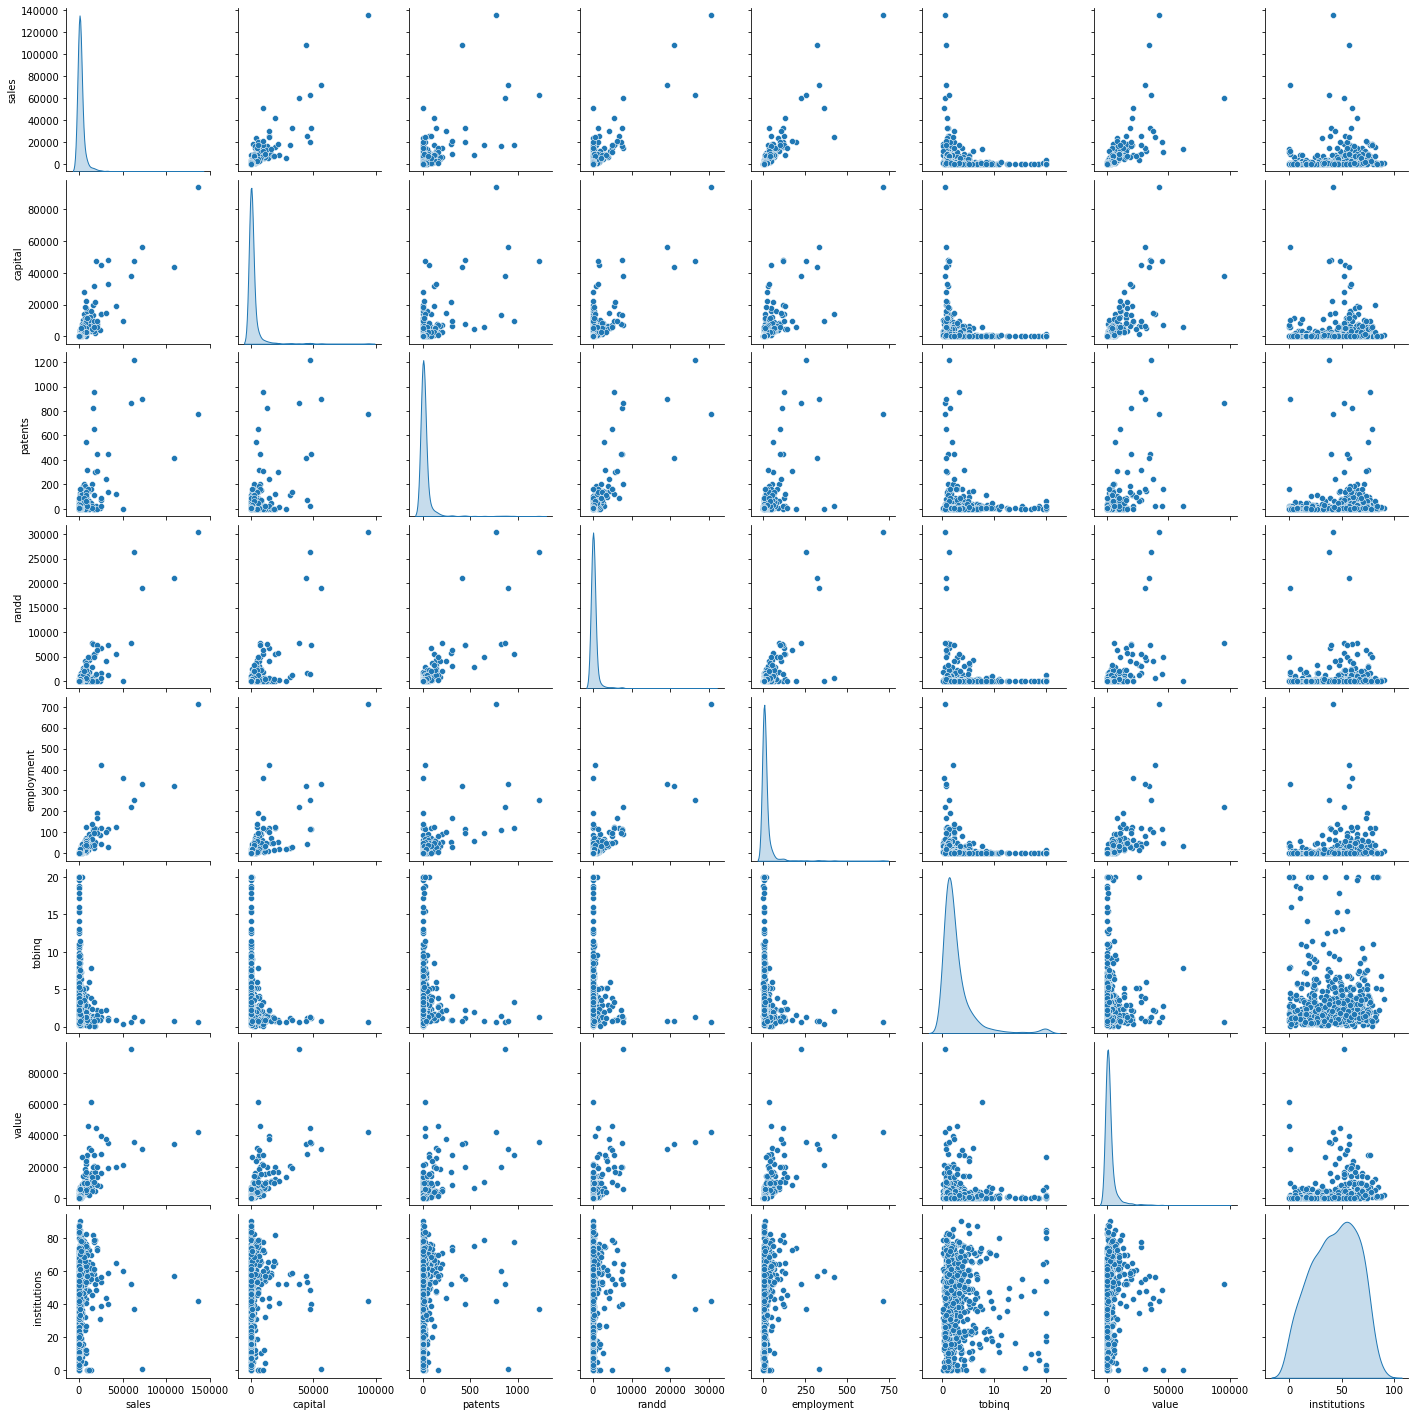

In [75]:
sns.pairplot(data = df, diag_kind='kde')  
plt.show()

### checking for Correlations 

<AxesSubplot:>

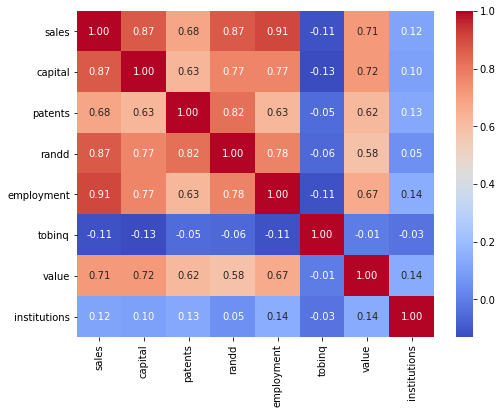

In [76]:
df_cor = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_cor, annot=True, fmt = '.2f', cmap='coolwarm')

In [77]:
# Let us see the significant correlation either negative or positive among independent attributes..
c = df.corr().abs() # Since there may be positive as well as -ve correlation
s = c.unstack() # 
so = s.sort_values(ascending=False) # Sorting according to the correlation
so=so[(so<1) & (so>0.3)].drop_duplicates().to_frame() # Due to symmetry.. dropping duplicate entries.
so.columns = ['correlation']
so

,,correlation
sales,employment,0.908868
randd,sales,0.870113
capital,sales,0.869595
patents,randd,0.820497
randd,employment,0.778005
employment,capital,0.771263
capital,randd,0.770468
value,capital,0.715893
sales,value,0.713778
patents,sales,0.682134


### Converting all objects to categorical codes

In [78]:
df = pd.get_dummies(df, columns=['sp500'],drop_first=True)

In [79]:
df.head()

,sales,capital,patents,randd,employment,tobinq,value,institutions,sp500_yes
0,826.995050,161.603986,10,382.078247,2.306000,11.049511,1625.453755,80.27,0
1,407.753973,122.101012,2,0.000000,1.860000,0.844187,243.117082,59.02,0
2,8407.845588,6221.144614,138,3296.700439,49.659005,5.205257,25865.233800,47.70,1
3,451.000010,266.899987,1,83.540161,3.071000,0.305221,63.024630,26.88,0
4,174.927981,140.124004,2,14.233637,1.947000,1.063300,67.406408,49.46,0


# 1.2) Impute null values if present? Do you think scaling is necessary in this case?

In [80]:
# Are there any missing values ?
df.isnull().sum()

sales            0
capital          0
patents          0
randd            0
employment       0
tobinq          21
value            0
institutions     0
sp500_yes        0
dtype: int64

### Imputing missing values

In [81]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum() 

sales           0
capital         0
patents         0
randd           0
employment      0
tobinq          0
value           0
institutions    0
sp500_yes       0
dtype: int64

In [82]:
df.head()

,sales,capital,patents,randd,employment,tobinq,value,institutions,sp500_yes
0,826.995050,161.603986,10,382.078247,2.306000,11.049511,1625.453755,80.27,0
1,407.753973,122.101012,2,0.000000,1.860000,0.844187,243.117082,59.02,0
2,8407.845588,6221.144614,138,3296.700439,49.659005,5.205257,25865.233800,47.70,1
3,451.000010,266.899987,1,83.540161,3.071000,0.305221,63.024630,26.88,0
4,174.927981,140.124004,2,14.233637,1.947000,1.063300,67.406408,49.46,0


In [83]:
clean_dataset=df.copy()

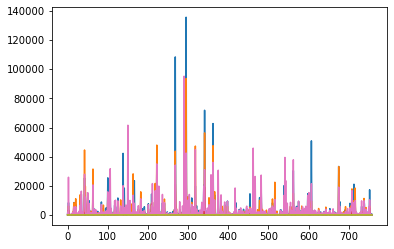

In [84]:
# prior to scaling 
plt.plot(clean_dataset)
plt.show()

In [85]:
# Scaling the attributes.

from scipy.stats import zscore
clean_dataset_Scaled=df.apply(zscore)
clean_dataset_Scaled.head()

,sales,capital,patents,randd,employment,tobinq,value,institutions,sp500_yes
0,-0.213704,-0.281030,-0.162882,-0.028842,-0.273914,2.488244,-0.156696,1.718839,-0.632747
1,-0.261802,-0.287143,-0.245190,-0.219303,-0.284216,-0.588020,-0.352317,0.738279,-0.632747
2,0.656027,0.656624,1.154052,1.424056,0.819869,0.726568,3.273585,0.215929,1.580410
3,-0.256841,-0.264737,-0.255479,-0.177659,-0.256243,-0.750485,-0.377803,-0.744789,-0.632747
4,-0.288514,-0.284354,-0.245190,-0.212208,-0.282206,-0.521972,-0.377183,0.297142,-0.632747


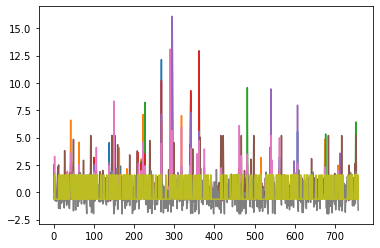

In [86]:
#after scaling
plt.plot(clean_dataset_Scaled)
plt.show()

In [87]:
# How do we improve the model? the R^2 is .844, how do we improve it
# The indpendent attributes have different units and scales of measurement 
# It is always a good practice to scale all the dimensions using z scores or someother methode to address the problem of different scales 

In [88]:
def check_outliers(data):
    vData_num = data.loc[:,data.columns != 'class']
    Q1 = vData_num.quantile(0.25)
    Q3 = vData_num.quantile(0.75)
    IQR = Q3 - Q1
    count = 0
    # checking for outliers, True represents outlier
    vData_num_mod = ((vData_num < (Q1 - 1.5 * IQR)) |(vData_num > (Q3 + 1.5 * IQR)))
    #iterating over columns to check for no.of outliers in each of the numerical attributes.
    for col in vData_num_mod:
        if(1 in vData_num_mod[col].value_counts().index):
            print("No. of outliers in %s: %d" %( col, vData_num_mod[col].value_counts().iloc[1]))
            count += 1
    print("\n\nNo of attributes with outliers are :", count)
    
check_outliers(df)

No. of outliers in sales: 100
No. of outliers in capital: 121
No. of outliers in patents: 122
No. of outliers in randd: 114
No. of outliers in employment: 103
No. of outliers in tobinq: 67
No. of outliers in value: 96


No of attributes with outliers are : 7


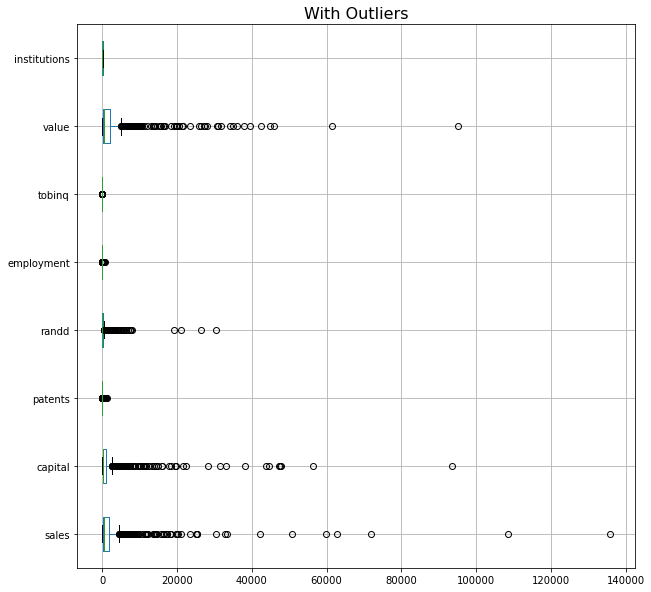

In [89]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [90]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [91]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

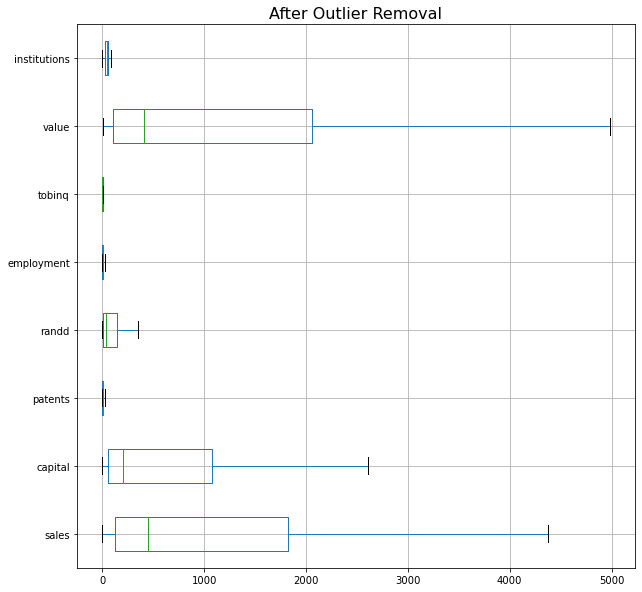

In [92]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

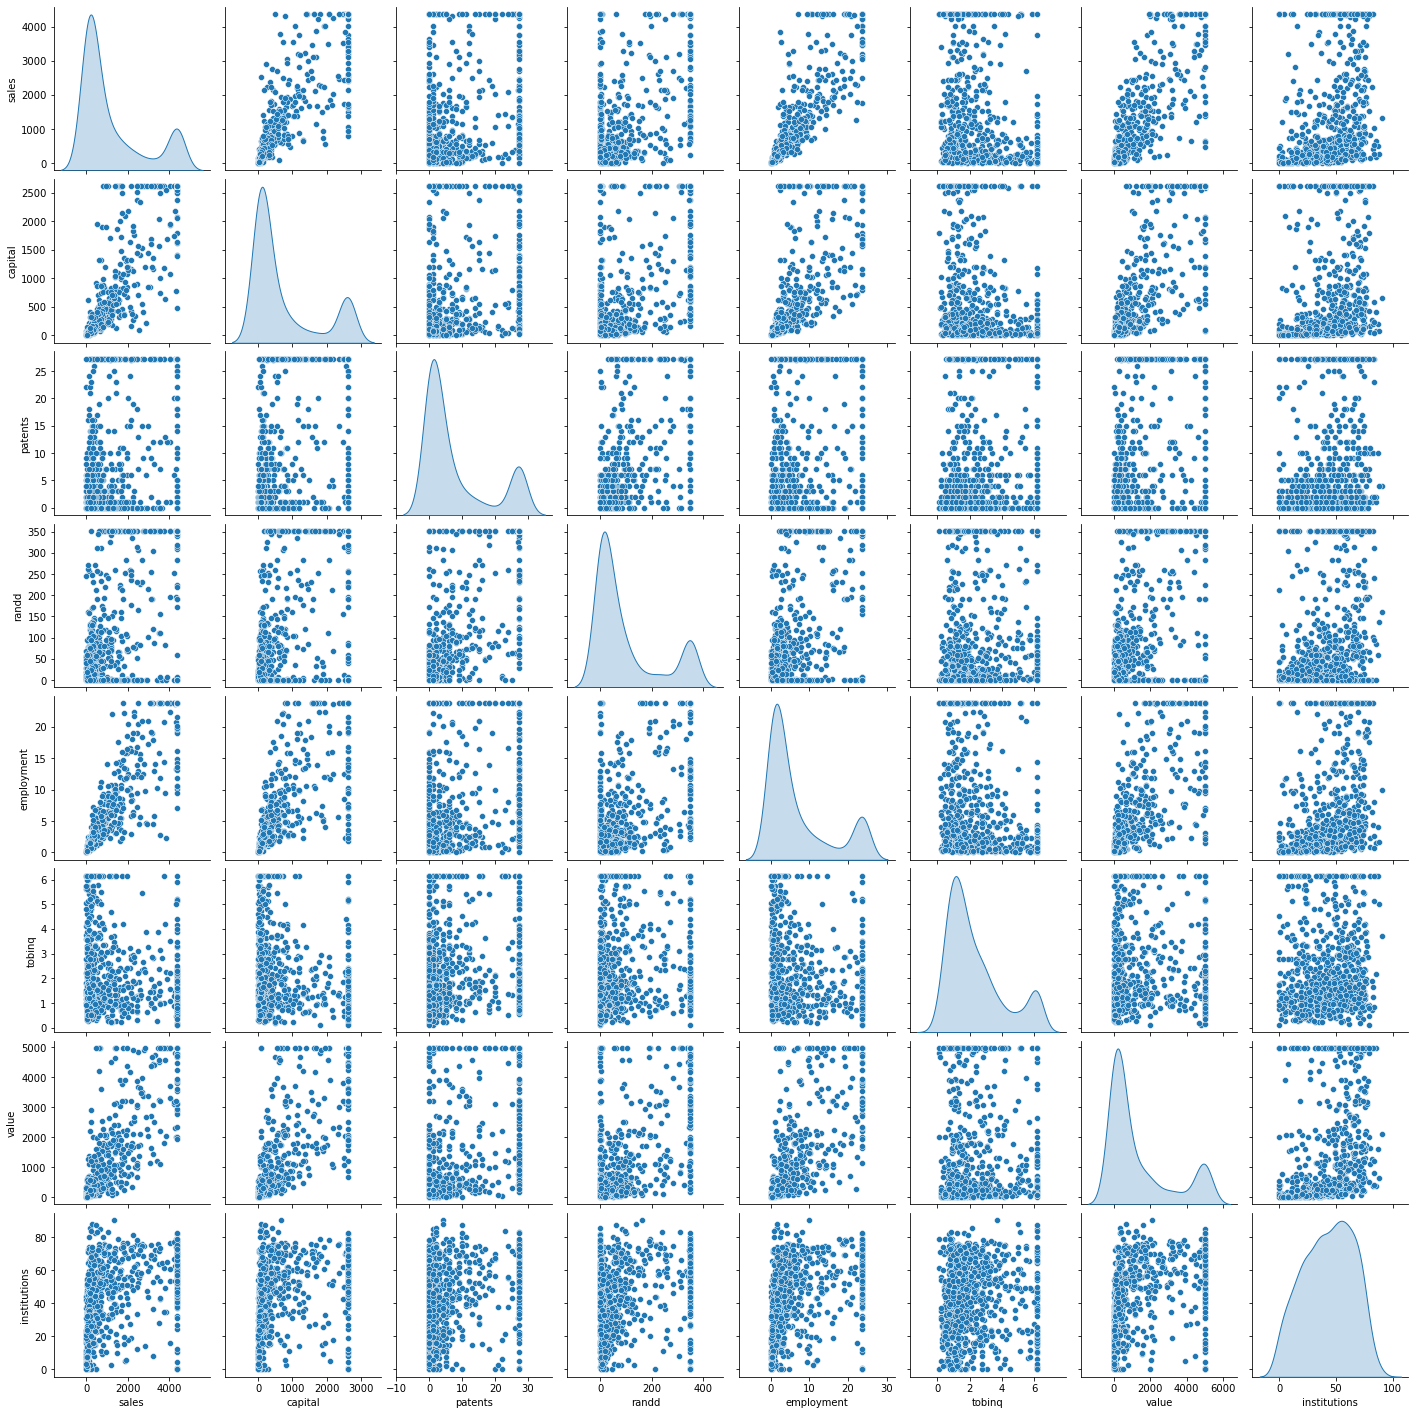

In [93]:
df_attr = (df[cont])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

# 1.3) Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using R-square, RMSE. (8 marks)

### Train-Test Split

In [94]:
# Copy all the predictor variables into X dataframe
X = df.drop('sales', axis=1)

# Copy target into the y dataframe. 
y = df[['sales']]

In [95]:
X.head()

,capital,patents,randd,employment,tobinq,value,institutions,sp500_yes
0,161.603986,10.00,351.191114,2.306000,6.153448,1625.453755,80.27,0
1,122.101012,2.00,0.000000,1.860000,0.844187,243.117082,59.02,0
2,2610.499299,27.25,351.191114,23.733752,5.205257,4980.010044,47.70,1
3,266.899987,1.00,83.540161,3.071000,0.305221,63.024630,26.88,0
4,140.124004,2.00,14.233637,1.947000,1.063300,67.406408,49.46,0


In [96]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

### Linear Regression Model

In [97]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [98]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for capital is 0.4061544084041548
The coefficient for patents is -4.647326848672819
The coefficient for randd is 0.6398846045072428
The coefficient for employment is 78.6137247907656
The coefficient for tobinq is -39.92578934013654
The coefficient for value is 0.24462524514528727
The coefficient for institutions is 0.21743855519967376
The coefficient for sp500_yes is 166.13208673705597


In [99]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 72.83112675546909


In [100]:
# R square on training data
regression_model.score(X_train, y_train)

0.9358806629736066

In [101]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9241294393352392

In [102]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

394.6129494572075

In [103]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

399.74321332112754

### Linear Regression using statsmodels

In [104]:
# ---------------------------------- Using Statsmodel library to get R type outputs -----------------------------

In [105]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,capital,patents,randd,employment,tobinq,value,institutions,sp500_yes,sales
626,1315.696256,15.0,73.275818,16.472000,1.657513,2231.870118,31.47,0,1947.224100
333,15.258002,2.0,9.252643,0.566000,0.381755,9.877838,21.69,0,60.327997
257,538.188036,20.0,87.388641,6.627000,2.126738,1019.443780,69.64,0,1065.748032
173,807.215091,0.0,68.900185,7.607001,3.151469,2221.768944,69.69,1,1193.647768
242,402.508010,2.0,0.000000,1.550000,2.154388,358.040202,85.42,0,164.135025


In [106]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'sales ~ capital+patents+randd+employment+tobinq+value+institutions+sp500_yes', data = data_train).fit()
lm1.params

Intercept        72.831127
capital           0.406154
patents          -4.647327
randd             0.639885
employment       78.613725
tobinq          -39.925789
value             0.244625
institutions      0.217439
sp500_yes       166.132087
dtype: float64

In [107]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     952.4
Date:                Fri, 28 Jan 2022   Prob (F-statistic):          1.05e-305
Time:                        17:13:12   Log-Likelihood:                -3927.7
No. Observations:                 531   AIC:                             7873.
Df Residuals:                     522   BIC:                             7912.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       72.8311     49.039      1.485   

In [108]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('sales',axis=1))-data_train['sales'])**2)

In [109]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

394.6129494572073

In [110]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

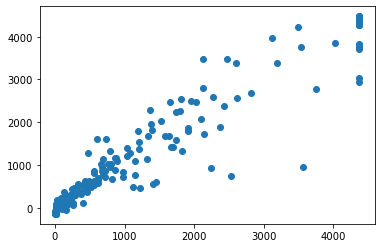

In [111]:
plt.scatter(y_test['sales'], y_pred)
plt.show()

In [112]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(72.83) * Intercept + (0.41) * capital + (-4.65) * patents + (0.64) * randd + (78.61) * employment + (-39.93) * tobinq + (0.24) * value + (0.22) * institutions + (166.13) * sp500_yes + 

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [114]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [115]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

capital ---> 8.594129880100176
patents ---> 4.115963077714671
randd ---> 4.715060025092689
employment ---> 8.834219233844008
tobinq ---> 2.7532434926791587
value ---> 9.114377911549704
institutions ---> 3.96259424309343
sp500_yes ---> 3.7643010848794525


In [116]:
# ------------------------------------------------- ITERATION 2  ---------------------------------------------------

In [117]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [137]:
X_train.head()

,capital,patents,randd,employment,tobinq,value,institutions,sp500_yes
626,1315.696256,15.0,73.275818,16.472000,1.657513,2231.870118,31.47,0
333,15.258002,2.0,9.252643,0.566000,0.381755,9.877838,21.69,0
257,538.188036,20.0,87.388641,6.627000,2.126738,1019.443780,69.64,0
173,807.215091,0.0,68.900185,7.607001,3.151469,2221.768944,69.69,1
242,402.508010,2.0,0.000000,1.550000,2.154388,358.040202,85.42,0


In [118]:
print('Number of rows and columns of the training set for the independent variables:',X_train_scaled.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train_scaled.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test_scaled.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test_scaled.shape)

Number of rows and columns of the training set for the independent variables: (531, 8)
Number of rows and columns of the training set for the dependent variable: (531, 1)
Number of rows and columns of the test set for the independent variables: (228, 8)
Number of rows and columns of the test set for the dependent variable: (228, 1)


In [119]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [138]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for capital is 0.21413741472917242
The coefficient for patents is -0.011065282178378821
The coefficient for randd is -0.01930847133549711
The coefficient for employment is 0.48114658230912
The coefficient for tobinq is -0.060095817663336534
The coefficient for value is 0.35196016825073884
The coefficient for institutions is 0.034879600449984186
The coefficient for sp500_yes is -0.051287099137726166


In [121]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -3.979785773049449e-17


In [122]:
# R square on training data
regression_model.score(X_train_scaled, y_train_scaled)

0.9358806629736066

In [123]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test_scaled, y_test_scaled)

0.9253116762151428

In [124]:
#RMSE on Training data
predicted_train_scaled=regression_model.fit(X_train_scaled, y_train_scaled).predict(X_train_scaled)
np.sqrt(metrics.mean_squared_error(y_train_scaled,predicted_train_scaled))

0.25321796347493475

In [125]:
#RMSE on Training data
predicted_test_scaled=regression_model.fit(X_test_scaled, y_test_scaled).predict(X_test_scaled)
np.sqrt(metrics.mean_squared_error(y_test_scaled,predicted_test_scaled))

0.2592081418981935

In [126]:
# concatenate X and y into a single dataframe
data_train_scaled = pd.concat([X_train_scaled, y_train_scaled], axis=1)
data_test_scaled=pd.concat([X_test_scaled,y_test_scaled],axis=1)
data_train_scaled.head()

,capital,patents,randd,employment,tobinq,value,institutions,sp500_yes,sales
626,0.578558,0.700541,-0.195638,1.126615,-0.381982,0.480026,-0.566460,-0.639131,0.437111
333,-0.750298,-0.586355,-0.697748,-0.783958,-1.128655,-0.784992,-1.016774,-0.639131,-0.773685
257,-0.215941,1.195500,-0.084956,-0.055932,-0.107355,-0.210229,1.191051,-0.639131,-0.128520
173,0.058965,-0.784339,-0.229954,0.061782,0.492398,0.474276,1.193353,1.564625,-0.046449
242,-0.354586,-0.586355,-0.770313,-0.665763,-0.091172,-0.586777,1.917631,-0.639131,-0.707074


In [127]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'sales ~ capital+patents+randd+employment+tobinq+value+institutions+sp500_yes', data = data_train_scaled).fit()
lm1.params

Intercept      -6.938894e-18
capital         2.550505e-01
patents        -3.012496e-02
randd           5.235558e-02
employment      4.199705e-01
tobinq         -4.377381e-02
value           2.757213e-01
institutions    3.030286e-03
sp500_yes       4.837414e-02
dtype: float64

In [128]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     952.4
Date:                Fri, 28 Jan 2022   Prob (F-statistic):          1.05e-305
Time:                        17:13:13   Log-Likelihood:                -24.125
No. Observations:                 531   AIC:                             66.25
Df Residuals:                     522   BIC:                             104.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -6.939e-18      0.011  -6.26e-16   

In [129]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)

In [130]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.2592081418981936

In [131]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test_scaled)

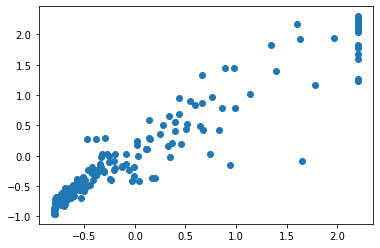

In [132]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test_scaled['sales'], y_pred)

In [133]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.0) * Intercept + (0.26) * capital + (-0.03) * patents + (0.05) * randd + (0.42) * employment + (-0.04) * tobinq + (0.28) * value + (0.0) * institutions + (0.05) * sp500_yes + 

In [134]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [135]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [136]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

capital ---> 8.594129880100176
patents ---> 4.115963077714671
randd ---> 4.715060025092689
employment ---> 8.834219233844008
tobinq ---> 2.7532434926791587
value ---> 9.114377911549704
institutions ---> 3.96259424309343
sp500_yes ---> 3.7643010848794525
